# Imports

## Import modules

In [1175]:
import numpy as np
import pandas as pd
import sys as sys
import mytools.mytools as mt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import re
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

### Configure column width

In [1063]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100

## Import data

In [1220]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
tt = pd.read_csv('tt.csv')

# A look at the data

In [1065]:
train.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Region,Elementary School,Elementary School Score,Elementary School Distance,Middle School,Middle School Score,Middle School Distance,High School,High School Score,High School Distance,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single family home that contains 1 sq ft and was built in ...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,"Ground Floor Bedroom, Master Bedroom on Ground Floor, Master Suite / Retreat, Walk-in Closet",0.0,NaN,1.0,0.0,0.0,Los Altos,Santa Rita Elementary School,7.0,0.4,NaN,NaN,NaN,Los Altos High School,8.0,1.3,"Tile, Hardwood, Carpet","Forced air, Gas",Central,"Dishwasher, Dryer, Garbage disposal, Microwave, Refrigerator, Washer","Washer / Dryer, Inside, In Utility Room","Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 baths, detached 2 car garage with plenty of parking ...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See Remarks","Detached Carport, Garage",4047.0,3,2.0,2.0,872.0,1.0,1.0,Los Angeles,Raymond Avenue Elementary School,3.0,0.8,John Muir Middle School,2.0,1.1,Augustus F. Hawkins High A Critical Design And Gaming,2.0,1.3,NaN,Combination,"Wall/Window Unit(s), Evaporative Cooling, See Remarks",NaN,Inside,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry delight in old Strawberry just about a 3-minute walk to ...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,2,3.0,1.0,1152.0,0.0,0.0,Strawberry,NaN,NaN,NaN,NaN,NaN,NaN,Long Barn High School,NaN,10.1,NaN,Forced air,NaN,NaN,NaN,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterranean conveniently located in Vet's Park close proxi...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,5,3.0,3.0,2612.0,0.0,0.0,Culver City,Farragut Elementary School,9.0,0.2,Culver City Middle School,7.0,0.2,Culver City High School,8.0,0.2,"Wood, Tile",Central,Central Air,Dishwasher,"Stackable, Upper Level","Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,"Beautiful 200 acre ranch land with several pastures, lots of level land, fully fenced with amazi...",VacantLand,NaN,NaN,NaN,0 spaces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creston,Santa Margarita Elementary School,6.0,8.5,Atascadero Middle School,5.0,10.2,Atascadero High School,6.0,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [1066]:
test.head()

,Id,Address,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Region,Elementary School,Elementary School Score,Elementary School Distance,Middle School,Middle School Score,Middle School Distance,High School,High School Score,High School Distance,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,47439,3034 N Coolidge Ave,Live within steps to the scenic views on the LA River and bike path. Coolidge Place is the epito...,SingleFamily,2020.0,Central,Central Air,Tandem Uncovered,940.0,2,4.0,3.0,1677.0,4.0,4.0,Los Angeles,Allesandro Elementary School,8.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,Vinyl,Central,Central Air,"Dishwasher, Disposal, Microwave, Tankless Water Heater, Water Line to Refrigerator",Stackable,Tandem Uncovered,NaN,NaN,2020-11-06,799900.0,2020-07-01,819000.0,Dodgertown,90090,CA
1,47440,565 Kenilworth Ave,duplex fixer. Input for comps only,SingleFamily,1924.0,Natural Gas,None,Detached,10018.8,3,2.0,NaN,1729.0,2.0,2.0,San Leandro,Roosevelt Elementary School,6.0,0.3,Bancroft Middle School,4.0,0.5,San Leandro High School,5.0,1.2,Wood,Natural Gas,None,NaN,Other,Detached,521977.0,7494.0,2014-04-04,479950.0,2020-11-03,15000.0,San Leandro,94577,CA
2,47441,3028 N Coolidge Ave,Live within steps to the scenic views on the LA River and bike path. Coolidge Place is the epito...,SingleFamily,2020.0,Central,Central Air,Tandem Uncovered,940.0,2,4.0,3.0,1677.0,4.0,4.0,Los Angeles,Allesandro Elementary School,8.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,Vinyl,Central,Central Air,"Dishwasher, Disposal, Microwave, Tankless Water Heater, Water Line to Refrigerator",Stackable,Tandem Uncovered,NaN,NaN,2020-11-12,839900.0,NaN,NaN,Los Angeles,90039,CA
3,47442,3022 N North Coolidge Ave,Live within steps to the scenic views on the LA River and bike path. Coolidge Place is the epito...,SingleFamily,2020.0,Central,Central Air,Tandem Uncovered,940.0,2,4.0,3.0,1609.0,4.0,4.0,Los Angeles,Allesandro Elementary School,8.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,Vinyl,Central,Central Air,"Dishwasher, Disposal, Microwave, Tankless Water Heater, Water Line to Refrigerator",Stackable,Tandem Uncovered,442800.0,5370.0,2020-11-06,809900.0,2020-09-21,810000.0,Dodgertown,90090,CA
4,47443,2515 Admiral Cir,"This beautiful, spacious home built in 2017 is truly one-of-a-kind and maintains its privacy, ba...",SingleFamily,2017.0,Forced Air,Central Air,"Garage Door Opener, Attached",2613.6,4,3.0,NaN,2377.0,2.0,2.0,Hayward,Lorin A. Eden Elementary School,4.0,1.0,Anthony W. Ochoa Middle School,4.0,2.1,Mount Eden High School,5.0,0.7,"Carpet, Tile",Forced Air,Central Air,"Water Filter System, Dishwasher, Disposal, Microwave, Range, Refrigerator",Laundry Room,"Garage Door Opener, Attached",965282.0,12912.0,2020-12-02,1095000.0,2019-12-27,1041000.0,Hayward,94545,CA


NB - lot refers to size of yard; total liveable area the sq. ft..

## Shape

In [1067]:
train.shape

(47439, 41)

In [1068]:
test.shape

(31626, 40)

## Describing the data

### Train

In [1069]:
train.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,47439.00,47439.00,46394.00,33258.00,43974.00,39574.00,44913.00,46523.00,46522.00,42543.00,42697.00,30734.00,30735.00,42220.00,42438.00,43787.00,43129.00,47439.00,29673.00,47439.00
mean,23719.00,1296050.50,1956.63,235338.26,2.36,2.09,5774.59,1.57,1.49,5.72,1.15,5.32,1.69,6.13,2.41,786311.76,9956.84,1315890.33,807853.71,93279.18
std,13694.60,1694452.20,145.80,11925073.92,1.19,0.96,832436.27,9.01,8.96,2.10,2.33,2.00,2.46,1.98,3.60,1157796.05,13884.25,2628695.46,1177902.64,2263.46
min,0.00,100500.00,0.00,0.00,0.00,1.00,1.00,-15.00,-15.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,85611.00
25%,11859.50,565000.00,1946.00,4991.00,2.00,2.00,1187.00,0.00,0.00,4.00,0.30,4.00,0.60,5.00,0.80,254961.50,3467.00,574500.00,335000.00,90220.00
50%,23719.00,960000.00,1967.00,6502.00,2.00,2.00,1566.00,1.00,1.00,6.00,0.50,5.00,1.00,6.00,1.30,547524.00,7129.00,949000.00,598000.00,94114.00
75%,35578.50,1525000.00,1989.00,10454.00,3.00,2.00,2142.00,2.00,2.00,7.00,1.00,7.00,1.80,8.00,2.40,937162.50,12010.00,1498844.00,950000.00,95073.00
max,47438.00,90000000.00,9999.00,1897473600.00,24.00,17.00,176416380.00,1000.00,1000.00,10.00,57.20,9.00,57.20,10.00,73.90,45900000.00,552485.00,402532000.00,90000000.00,96155.00


Suppress scientific notation - https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation

In [1070]:
train.describe(include=['O'])

,Address,Summary,Type,Heating,Cooling,Parking,Bedrooms,Region,Elementary School,Middle School,High School,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Listed On,Last Sold On,City,State
count,47439,47089,47439,40974,36817,46531,44567,47437,42697,30735,42439,35875,40274,35657,33997,33315,43131,47439,29673,47439,47439
unique,47325,46788,158,1860,541,5113,264,949,1717,488,630,1348,1122,312,4584,1976,4960,2467,6113,929,2
top,55 W 20th Ave,"Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...",SingleFamily,Central,None,"Garage, Garage - Attached, Covered",3,Los Angeles,Laurel Elementary School,Hubert Howe Bancroft Middle School,Fairfax Senior High School,Wood,"Forced air, Gas",Central,"Dishwasher, Dryer, Garbage disposal, Microwave, Range / Oven, Refrigerator, Washer",Inside,"Garage, Garage - Attached, Covered",2020-10-16,2017-06-30,Los Angeles,CA
freq,4,18,31324,9593,10072,10392,14943,10338,339,949,1451,4021,8331,12373,2003,3901,10481,286,34,10246,46991


In [1071]:
query = train.Summary.dropna().copy() #NaN stops contains search, copied so index could be searched

In [1072]:
query[query.str.contains("Neighboring The Ace Hotel")]

5600     Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
5730     Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
6201     Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
7227     Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
7242     Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
8496     Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
9249     Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
10555    Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
11293    Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
12036    Neighborin

NB - this is a condominium.

#### Function to plot na in dataframe

In [1073]:
def plot_na(x):
    missing = x.isna().sum()
    missing = missing[missing>0]
    missing.sort_values(inplace=True)
    return missing.plot(kind='bar', colormap='summer')

<AxesSubplot:>

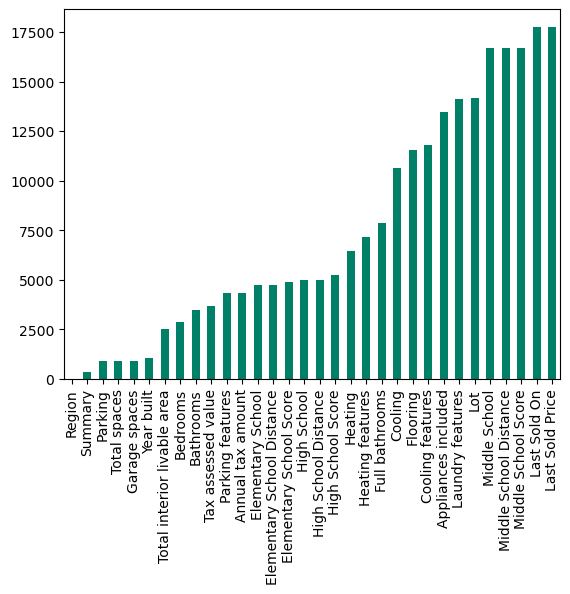

In [1074]:
plot_na(train)

### Test

In [1075]:
test.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Id,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,31626.00,30729.00,22818.00,29681.00,26563.00,30274.00,30875.00,30876.00,27787.00,27875.00,20052.00,20053.00,29061.00,29452.00,28955.00,28727.00,31626.00,19847.00,31626.00
mean,63251.50,1971.96,564027.66,2.44,2.11,1904.24,2.31,1.99,5.69,1.12,5.15,1.74,6.20,2.26,533271.00,6726.43,873523.29,530488.11,92989.64
std,9129.78,97.84,27784299.28,1.12,0.91,3628.51,18.72,18.65,2.02,1.94,2.05,2.09,1.97,2.81,779003.62,10753.21,1154445.37,651271.16,1779.82
min,47439.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,85611.00
25%,55345.25,1956.00,5400.00,2.00,2.00,1223.00,1.00,1.00,4.00,0.30,3.00,0.70,5.00,0.90,198158.50,2623.00,400110.50,228000.00,91761.00
50%,63251.50,1978.00,7152.50,2.00,2.00,1617.00,2.00,2.00,6.00,0.60,5.00,1.20,6.00,1.50,365013.00,4704.00,619000.00,385000.00,92683.00
75%,71157.75,1996.00,10890.00,3.00,2.00,2203.00,2.00,2.00,7.00,1.10,7.00,2.00,8.00,2.50,613792.00,7869.50,949000.00,614150.00,94561.00
max,79064.00,9999.00,2217378240.00,24.00,24.00,510523.00,3109.00,3109.00,10.00,56.90,10.00,57.00,10.00,58.00,38967556.00,999999.00,42500000.00,18800188.00,96150.00


In [1076]:
test.describe(include=['O'])

,Address,Summary,Type,Heating,Cooling,Parking,Bedrooms,Region,Elementary School,Middle School,High School,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Listed On,Last Sold On,City,State
count,31626,31137,31626,26578,27139,30858,29900,31626,27875,20053,29452,21263,26243,26775,21719,25768,29306,31626,19847,31626,31626
unique,31559,31019,56,1430,641,6181,120,1028,3415,800,891,997,1134,467,8119,1947,6048,1390,5844,940,2
top,25474 Kamran Cir,"Aspire at River Terrace in Stockton, CA offers 2 designs of single family new homes up to 1,935 ...",SingleFamily,Central,Central Air,Garage - Attached,3,Los Angeles,Washington Elementary School,Alder Creek Middle School,Fairfax Senior High School,"Carpet, Tile",Central,Central Air,Dishwasher,In Garage,Garage - Attached,2021-01-13,2020-10-30,Los Angeles,CA
freq,2,7,22197,9778,12651,4060,12284,1935,173,210,264,1953,7989,11261,481,3419,4063,2022,22,1672,31568


In [1077]:
mt.eda.glance(test)

SHAPE:
(31626, 40)

DESCRIPTION:
             Id Year built            Lot Bathrooms Full bathrooms  \
count  31626.00   30729.00       22818.00  29681.00       26563.00   
mean   63251.50    1971.96      564027.66      2.44           2.11   
std     9129.78      97.84    27784299.28      1.12           0.91   
min    47439.00       0.00           0.00      0.00           1.00   
25%    55345.25    1956.00        5400.00      2.00           2.00   
50%    63251.50    1978.00        7152.50      2.00           2.00   
75%    71157.75    1996.00       10890.00      3.00           2.00   
max    79064.00    9999.00  2217378240.00     24.00          24.00   

      Total interior livable area Total spaces Garage spaces  \
count                    30274.00     30875.00      30876.00   
mean                      1904.24         2.31          1.99   
std                       3628.51        18.72         18.65   
min                          1.00         0.00          0.00   
25%             

<AxesSubplot:>

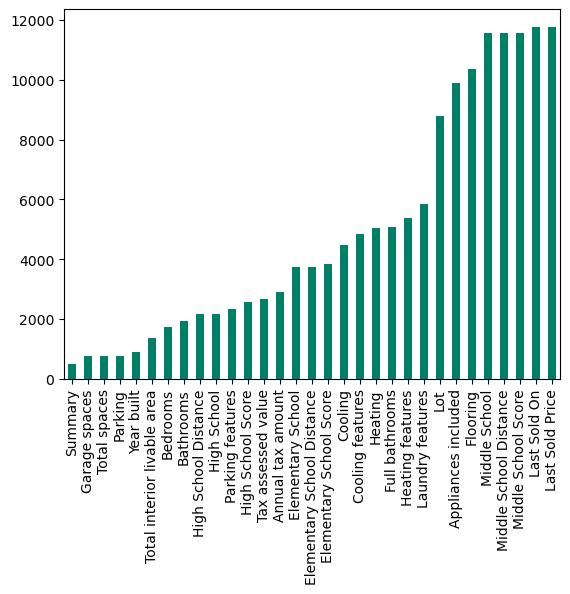

In [1078]:
plot_na(test)

## Clean-up

### Removing useless information

In [1079]:
tt = tt[['Id', 'Address', 'Sold Price', 'Summary', 'Type', 'Year built',
       'Heating', 'Cooling', 'Parking', 'Lot', 'Bedrooms', 'Bathrooms',
       'Full bathrooms', 'Total interior livable area', 'Total spaces',
       'Garage spaces', 'Region', 
        #'Elementary School',
       'Elementary School Score', 'Elementary School Distance',
       #'Middle School', 
        'Middle School Score', 'Middle School Distance',
       #'High School', 
        'High School Score', 'High School Distance', 'Flooring',
       #'Heating features', 'Cooling features',
        'Appliances included',
       'Laundry features', 'Parking features', 'Tax assessed value',
       'Annual tax amount', 'Listed On', 'Listed Price', 'Last Sold On',
       'Last Sold Price', 'City', 'Zip', 'State']].copy()

### Columns names

Replace all ' ' in column names with '_'

In [1080]:
tt.columns = tt.columns.str.replace(' ', '_')

In [1081]:
tt.columns

Index(['Id', 'Address', 'Sold_Price', 'Summary', 'Type', 'Year_built',
       'Heating', 'Cooling', 'Parking', 'Lot', 'Bedrooms', 'Bathrooms',
       'Full_bathrooms', 'Total_interior_livable_area', 'Total_spaces',
       'Garage_spaces', 'Region', 'Elementary_School_Score',
       'Elementary_School_Distance', 'Middle_School_Score',
       'Middle_School_Distance', 'High_School_Score', 'High_School_Distance',
       'Flooring', 'Appliances_included', 'Laundry_features',
       'Parking_features', 'Tax_assessed_value', 'Annual_tax_amount',
       'Listed_On', 'Listed_Price', 'Last_Sold_On', 'Last_Sold_Price', 'City',
       'Zip', 'State'],
      dtype='object')

### Dates

In [1082]:
tt[['Year_built', 'Listed_On', 'Last_Sold_On']].dtypes

Year_built      float64
Listed_On        object
Last_Sold_On     object
dtype: object

days, years etc from present?

In [1083]:
tt['Listed_On'] = pd.to_datetime(tt['Listed_On'], format='%Y-%m-%d')

In [1084]:
tt['Last_Sold_On'] = pd.to_datetime(tt['Last_Sold_On'], format='%Y-%m-%d')

Linear regression algorithm can't make direct use of a datetime or str object. We're going to convert Listed_On and Last_Sold_On to datetime64 objects, calculate the number of days from the present and then use a function to insert those values in the place of the date time object.

#### Function for calcuating days from present

In [1085]:
listed_present = tt.Listed_On.max().date() + datetime.timedelta(days=1)
last_sold_present = tt.Last_Sold_On.max().date() + datetime.timedelta(days=1)

In [1086]:
def days_ago(x):
    if pd.isnull(x) is False:
        x = listed_present - x.date()
        x = x.days
        return x
    else:
        return 'NaT'

In [1087]:
tt['Days_Listed'] = tt.Listed_On.apply(days_ago)

In [1088]:
tt['Days_Sold'] = tt.Last_Sold_On.apply(days_ago)

In [1089]:
tt= tt.drop(['Listed_On', 'Last_Sold_On'], axis=1).copy()

In [1090]:
tt.columns

Index(['Id', 'Address', 'Sold_Price', 'Summary', 'Type', 'Year_built',
       'Heating', 'Cooling', 'Parking', 'Lot', 'Bedrooms', 'Bathrooms',
       'Full_bathrooms', 'Total_interior_livable_area', 'Total_spaces',
       'Garage_spaces', 'Region', 'Elementary_School_Score',
       'Elementary_School_Distance', 'Middle_School_Score',
       'Middle_School_Distance', 'High_School_Score', 'High_School_Distance',
       'Flooring', 'Appliances_included', 'Laundry_features',
       'Parking_features', 'Tax_assessed_value', 'Annual_tax_amount',
       'Listed_Price', 'Last_Sold_Price', 'City', 'Zip', 'State',
       'Days_Listed', 'Days_Sold'],
      dtype='object')

### Getting useful information

#### Address

number, length of numbers, type of road

In [1091]:
tt['Address_Number'] = tt.Address.apply(lambda x: x.split()[0])

In [1092]:
tt['Address_RdType'] = tt.Address.apply(lambda x: x.split()[-1])

In [1093]:
tt['Address_NoLen'] = tt.Address_Number.apply(lambda x: len(x))

##### Address_RdType

The single letters and numbers appear to refers to apartments/units. The #A, #B, and #1 appear to be related to condos, apartments or large buildings subdividied into multiple salable properties. This information is better captured by 'Type'.

In [1094]:
road_types = ['Ave', 'St', 'Dr', 'Rd', 'Ct', 'Way', 'Ln', 'Pl', 'Cir', 'Blvd', 'Ter', 'Trl', 'Loop']

In [1095]:
tt["Address_RdType"] = tt.Address_RdType.apply(lambda x: x if x in road_types else 'NaN').copy()

In [1096]:
tt.Address_RdType.value_counts()

NaN     16377
Ave     15094
St      12725
Dr      11397
Rd       5888
Ct       4171
Way      4018
Ln       3779
Pl       1931
Cir      1502
Blvd     1228
Ter       503
Trl       249
Loop      203
Name: Address_RdType, dtype: int64

In [1097]:
tt = tt.drop('Address_Number', axis=1).copy()

##### Address_NoLen

In [1098]:
tt.Address_NoLen.value_counts()

4     39498
3     22704
5     12457
2      3153
1       894
7       174
9       105
6        57
8         8
11        8
10        6
15        1
Name: Address_NoLen, dtype: int64

#### Summary

Could also do capital letters and exclamtion, sentiment? 

##### Length

In [1099]:
tt['Summary_Len']= tt.Summary.apply(lambda x: len(x) if type(x) == str else 'NaN').copy()

#### Type

In [1100]:
def val_count_unique(x, n): #x is the data, n is how many counts for inclusion
    x = x.value_counts().loc[lambda x: x > n].rename_axis('Unique_Value').reset_index(name='Count')
    return list(x['Unique_Value'])

In [1101]:
val_count_unique(tt.Type, 10)

['SingleFamily',
 'Condo',
 'Townhouse',
 'MultiFamily',
 'Unknown',
 'MobileManufactured',
 'VacantLand',
 'Single Family',
 'Apartment',
 'Cooperative',
 'Residential Lot',
 'MFD-F',
 '2 Story',
 'Acreage',
 'Condominium',
 'Duplex',
 '3 Story',
 'Manufactured Home']

In [1102]:
tt['Type'] =  tt.Type.map({'SingleFamily': 'SingleFamily',
 'Condo': 'Condo',
 'Townhouse': 'Townhouse',
 'MultiFamily': 'MultiFamily',
 'Unknown': 'NaN',
 'MobileManufactured': 'MobileManufactured',
 'VacantLand': 'VacantLand',
 'Single Family': 'SingleFamily' ,
 'Apartment': 'Apartment',
 'Cooperative': 'Cooperative',
 'Residential Lot': 'ResidentialLot',
 'MFD-F': 'MultiFamily',
 '2 Story': '2 Story',
 'Acreage': 'VacantLand',
 'Condominium': 'Condo',
 'Duplex': '2 Story',
 '3 Story': '3 Story',
 'Manufactured Home': 'ManufacturedHome'}).copy()

In [1103]:
tt.Type.value_counts()

SingleFamily          53883
Condo                 12813
Townhouse              4096
MultiFamily            2296
NaN                    2168
MobileManufactured     1577
VacantLand             1529
Apartment               191
Cooperative             100
ResidentialLot           59
2 Story                  36
3 Story                  12
ManufacturedHome         12
Name: Type, dtype: int64

#### Heating

At the highest level, can be divided into Central (Heatpumps, Boilers, Furnace) or Direct (Space Heater, Stove, Fireplaces) or or State-Of-The_Art (Radiant, Ductless, CHP) or None.

If has Central, and others, Central must be dominant.

I did attempt use of Regex, which worked in an online Regex validator but not here.

In [1104]:
tt['Heating'] = np.where(tt.Heating.str.contains("Central|Heatmap|Boiler|Furnace|Forced", case=False, regex=True), 'Central', tt['Heating']).copy()

In [1105]:
tt['Heating'] = np.where(tt.Heating.str.contains("Heater|Stove|Fireplace|Fireplaces", case=False, regex=True), 'Direct', tt['Heating']).copy()

In [1106]:
tt['Heating'] = np.where(tt.Heating.str.contains("Radiant|Ductless|CHP", case=False, regex=True), 'Advanced', tt['Heating']).copy()

In [1107]:
val_count_unique(tt.Heating, 50)

['Central',
 'Other',
 'Direct',
 'Advanced',
 'Electric',
 'None',
 'Gas',
 'Natural Gas',
 'Baseboard',
 'Wall',
 'Zoned',
 'Heat Pump',
 'Other, Gas',
 'See Remarks',
 'Gravity',
 'Baseboard, Electric',
 'None, Other',
 'Propane',
 'Electric, Baseboard',
 'Heating - 2+ Zones',
 'Steam',
 'Zoned, Natural Gas',
 'Wall, Gas',
 'Natural Gas, CFAH',
 'Combination']

In [1108]:
tt['Heating'] =  tt.Heating.map({'Central': 'Central',
 'Other': 'Other',
 'Direct': 'Direct',
 'Advanced': 'Advanced',
 'Electric': 'Central',
 'None': 'None',                                
 'Gas': 'Central',
 'Natural Gas': 'Central',
 'Baseboard': 'Advanced',
 'Wall': 'Advanced',
 'Zoned': 'Advanced',
 'Heat Pump': 'Central', 
 'Other, Gas': 'Central', 
 'See Remarks': 'Central',
 'Gravity': 'Central',
 'Baseboard, Electric': 'Advanced', 
 'None, Other': 'None' , 
 'Propane': 'Central',
 'Electric, Baseboard': 'Advanced',
 'Heating - 2+ Zones': 'Advanced',
 'Steam': 'Central',
 'Zoned, Natural Gas': 'Advanced',
 'Wall, Gas': 'Advanced',
 'Natural Gas, CFAH': 'Central',
 'Combination': 'Central'}).copy()

In [1109]:
tt.Heating.value_counts()

Central     70871
Advanced     2638
Other        2074
Direct       1258
None          813
Name: Heating, dtype: int64

#### Cooling

Divide into Central, Room, Evaporative, Advanced and None.

In [1110]:
tt['Cooling'] = np.where(tt.Cooling.str.contains("Central|Heatpump|Heat Pump", case=False, regex=True), 'Central', tt['Cooling']).copy()

In [1111]:
tt['Cooling'] = np.where(tt.Cooling.str.contains("Ceiling|Window|Wall", case=False, regex=True), 'Room', tt['Cooling']).copy()

In [1112]:
val_count_unique(tt.Cooling, 50)

['Central',
 'None',
 'Room',
 'Other',
 'See Remarks',
 'Evaporative Cooling',
 'Zoned',
 'No Air Conditioning',
 'Evaporative',
 'Whole House / Attic Fan',
 'Air Conditioning',
 'Dual',
 'Electric',
 'Refrigerator',
 'Other-Rmks',
 'Multi-Zone',
 'CFAC']

In [1113]:
tt['Cooling'] = tt.Cooling.map({'Central': 'Central',
 'None': 'None',
 'Room': 'Room',
 'Other': 'Other',
 'See Remarks': 'Central',
 'Evaporative Cooling': 'Evaporative',
 'Zoned': 'Advanced',
 'No Air Conditioning': 'None',
 'Evaporative': 'Evaporative',
 'Whole House / Attic Fan': 'Central',
 'Air Conditioning': 'Central',
 'Dual': 'Central',
 'Electric': 'Central',
 'Refrigerator': 'Central',
 'Other-Rmks': 'Central',
 'Multi-Zone': 'Advanced',
 'CFAC': 'Central'}).copy()

In [1114]:
tt.Cooling.value_counts()

Central        56233
None           15315
Room            4884
Other           1157
Evaporative      518
Advanced         353
Name: Cooling, dtype: int64

#### Garage

In [1115]:
tt['Parking'] = np.where(tt.Parking.str.contains("Garage|Carport|Structure|Attached|Private|Covered|Gated|Controlled|RV|Interior|Valet|Gar", case=False, regex=True), 'Garage', tt['Parking']).copy()

In [1116]:
tt['Parking'] = np.where(tt.Parking.str.contains("Street|Driveway|Concrete|Detached|Side|Underground|Independent|Open|Tandem|Gravel", case=False, regex=True), 'No_Garage', tt['Parking']).copy()

In [1117]:
val_count_unique(tt.Parking, 40)

['Garage',
 'No_Garage',
 '0 spaces',
 'None',
 'Assigned',
 'Direct Access',
 'On Site (Single Family Only)',
 'Other',
 'Parking Space']

In [1118]:
tt['Parking'] = tt.Parking.map({'Garage': 'Garage',
 'No_Garage': 'No_Garage',
 '0 spaces': 'None',
 'None': 'None',
 'Assigned': 'No_Garage',
 'Direct Access': 'No_Garage',
 'On Site (Single Family Only)': 'No_Garage',
 'Other': 'No_Garage',
 'Parking Space': 'No_Garage'}).copy()

In [1119]:
tt.Parking.value_counts()

Garage       66518
No_Garage     6644
None          5316
Name: Parking, dtype: int64

#### Bedrooms

Count occurences of commas + 1, use that as proxy for number of bedrooms.

In [1120]:
tt['Bedrooms'] = tt.Bedrooms.astype('str').copy()

In [1121]:
tt['Bedrooms']= tt.Bedrooms.apply(lambda x: x.count(',')+1 if len(x) > 1 else x).copy()

In [1122]:
tt.Bedrooms.value_counts().loc[lambda x: x > 100]

3    27227
2    15835
4    14058
1     8311
5     4004
1     3436
2     2504
3     1256
6      888
4      492
0      455
7      217
5      176
8      112
Name: Bedrooms, dtype: int64

In [1123]:
tt.Region.value_counts().loc[lambda x: x > 100]

Los Angeles      12273
San Jose          7298
San Francisco     5743
San Diego         1100
San Mateo          910
                 ...  
Palmdale           103
Downey             103
Covina             102
Urban              101
Thousand Oaks      101
Name: Region, Length: 105, dtype: int64

#### School Score

In [1124]:
def avg_score(row):
    x = [row['Elementary_School_Score'], row['Middle_School_Score'], row['High_School_Score']]
    count = 3 - x.count(0)
    total = sum(x)
    if count == 0:
        return 0
    else:
        return total/count

In [1125]:
tt = tt.fillna({'Elementary_School_Score': 0, 'Middle_School_Score': 0, 'High_School_Score': 0}).copy()

In [1126]:
tt['Schools_Score'] = tt.apply(avg_score, axis=1)

In [1127]:
tt = tt.drop(['Elementary_School_Score', 'Middle_School_Score', 'High_School_Score'], axis=1).copy()

#### School Distance

In [1128]:
def avg_distance(row):
    x = [row['Elementary_School_Distance'], row['Middle_School_Distance'], row['High_School_Distance']]
    count = 3 - x.count(0)
    total = sum(x)
    if count == 0:
        return 0
    else:
        return total/count

In [1129]:
tt = tt.fillna({'Elementary_School_Distance': 0, 'Middle_School_Distance': 0, 'High_School_Distance': 0}).copy()

In [1130]:
tt['Schools_Distance'] = tt.apply(avg_distance, axis=1)

In [1131]:
tt.loc[:, ['Elementary_School_Distance', 'Middle_School_Distance', 'High_School_Distance', 'Schools_Distance']]

,Elementary_School_Distance,Middle_School_Distance,High_School_Distance,Schools_Distance
0,0.4,0.0,1.3,0.850000
1,0.8,1.1,1.3,1.066667
2,0.0,0.0,10.1,10.100000
3,0.2,0.2,0.2,0.200000
4,8.5,10.2,10.6,9.766667
...,...,...,...,...
31621,5.5,4.6,5.3,5.133333
31622,0.8,0.9,0.9,0.866667
31623,2.6,2.5,3.7,2.933333
31624,1.0,0.9,1.7,1.200000


In [1132]:
tt = tt.drop(['Elementary_School_Distance', 'Middle_School_Distance', 'High_School_Distance'], axis=1).copy()

#### Flooring

Wood, Hardwood, Laminate, Carpet, Tile.

In [1133]:
tt['Flooring'] = np.where(tt.Flooring.str.contains(",", case=False, regex=True), 'Mixed', tt['Flooring']).copy()

In [1134]:
tt.Flooring = tt.Flooring.map({'Mixed': 'Mixed',
 'Wood': 'Wood',
 'Laminate': 'Laminate',
 'Hardwood': 'Hardwood',
 'Carpet': 'Carpet',
 'Tile': 'Tile',
 'Vinyl': 'Vinyl',
 'Other': 'Mixed',
 'Concrete': 'Concrete',
 'See Remarks': 'Mixed',
 'Bamboo': 'Wood',
 'Ceramic Tile': 'Tile',
 'Linoleum / Vinyl': 'Vinyl',
 'Hardwood Flrs Throughout': 'Hardwood',
 'Stone': 'Tile',
 'Vinyl / Linoleum': 'Vinyl',
 'Simulated Wood': 'Wood',
 'Engineered Wood': 'Wood',
 'Other-Rmks': 'Mixed',
 'Linoleum/Vinyl': 'Vinyl',
 'Cement': 'Concrete',
 'None': 'Concrete',
 'Linoleum': 'Vinyl',
 'Parquet': 'Hardwood', 
 'Marble': 'Mixed',
 'Combination': 'Mixed',
 'Vinyl/Linoleum': 'Vinyl',
 'Softwood': 'Wood',
 'Brick': 'Concrete',
 'Mexican Tile': 'Tile',
 'Travertine': 'Tile',
 'Wood/Wood Like': 'Wood',
 'Vinyl Tile': 'Vinyl',
 'Other-Attch': 'Mixed',
 'Slate': 'Tile',
 'Laminated': 'Vinyl',
 'Sustainable Materials': 'Mixed',
 'Carpeted': 'Carpet',
 'Plank': 'Wood',
 'Varies by Unit': 'Mixed',
 'Cork': 'Wood',
 'Partial Carpeting': 'Mixed',
 'Travertine And Wood': 'Mixed',
 'Brazilian Tile': 'Tile',
 'laminate': 'Vinyl',
 'Partial Carpet': 'Mixed',
 'Unfinished': 'Concrete',
 'Natural Stone': 'Tile',
 'Custom Concrete': 'Concrete',
 'Varies': 'Mixed',
 'Needs To Be Replaced': 'Concrete',
 'Painted/Stained': 'Mixed',
 'Tbd': 'Concrete',
 'CRI Green Label Plus Certified Carpet': 'Carpet',
 'Reclaimed': 'Wood',
 'Prem. Wood Based Lam': 'Wood',
 'Reclaimed Wood': 'Wood'}).copy()

In [1135]:
tt.Flooring.value_counts()

Mixed       62782
Wood         5950
Laminate     3183
Hardwood     2989
Tile         1580
Carpet       1564
Vinyl         669
Concrete      348
Name: Flooring, dtype: int64

#### Appliances_included

In [1136]:
tt.Appliances_included = tt.Appliances_included.fillna(0).copy()

In [1137]:
def row_elements(row):
    if type(row) == int:
        return row
    else:
        return row.count(',') + 1

In [1138]:
tt['Total_Appliances'] = tt.Appliances_included.apply(row_elements)

In [1139]:
tt.loc[:, ['Appliances_included', 'Total_Appliances']]

,Appliances_included,Total_Appliances
0,"Dishwasher, Dryer, Garbage disposal, Microwave, Refrigerator, Washer",6
1,0,0
2,0,0
3,Dishwasher,1
4,0,0
...,...,...
31621,"Dishwasher, Disposal, Dryer, Microwave, Oven, Range, Refrigerator, Washer",8
31622,"Dishwasher, Electric Oven, Disposal, Gas Water Heater",4
31623,0,0
31624,"Dishwasher, Disposal, Microwave",3


In [1140]:
tt = tt.drop('Appliances_included', axis=1).copy()

#### Laundry_features

Hookup vs no hookup.

In [1141]:
tt['Hookups'] = np.where(tt.Laundry_features.str.contains(r"hook", case=False, regex=True), 'Y', tt['Laundry_features']).copy()

In [1142]:
tt['Hookups'] = np.where(tt.Hookups != 'Y', 'N', tt['Hookups']).copy()

In [1143]:
tt.Hookups.value_counts()

N    45366
Y    33699
Name: Hookups, dtype: int64

In [1144]:
tt = tt.drop('Laundry_features', axis=1).copy()

#### Zip

Opening three digits give region.

In [1145]:
tt['Zip'] = tt.Zip.apply(lambda x: str(x)[:3]).copy()

In [1146]:
tt.Zip.value_counts()

900    12824
950     7101
951     7032
941     5744
940     5111
945     2449
902     2348
956     1922
917     1621
953     1544
923     1401
926     1394
920     1366
913     1306
925     1302
954     1234
921     1171
928     1155
944     1125
959     1098
932      963
936      951
922      945
960      935
934      906
958      871
952      837
949      787
930      729
919      679
907      671
906      613
935      598
961      554
943      551
939      520
856      506
955      496
946      494
957      487
937      486
910      416
933      393
908      392
927      319
912      302
947      299
914      286
931      276
911      247
924      214
916      214
905      176
915      174
903      165
948      151
904      139
918       75
Name: Zip, dtype: int64

#### Removing useless columns

Useful information has been extracted from Address and Summary. Parking_features is accounted for by Parking. Region and city accounted for by Zip.

In [1147]:
tt = tt.drop(['Address', 'Region', 'Parking_features', 'City', 'Summary'], axis=1).copy()

### Distribution of Sold_Price

We will need a series of normally distributed prices for at least the OLS model.

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

#### Histogram

<AxesSubplot:xlabel='Sold_Price', ylabel='Count'>

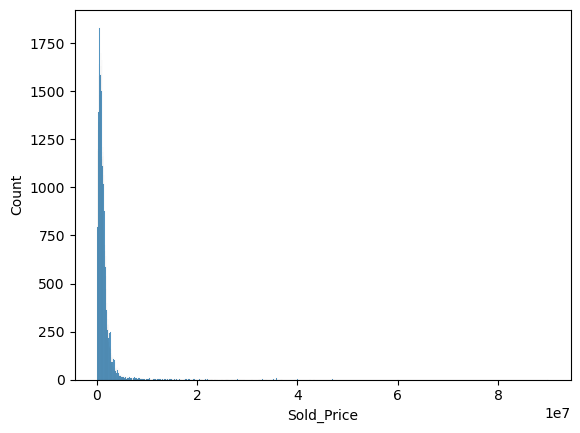

In [1154]:
sns.histplot(data=tt.Sold_Price)

#### QQ Plot

TypeError: 'Figure' object is not subscriptable

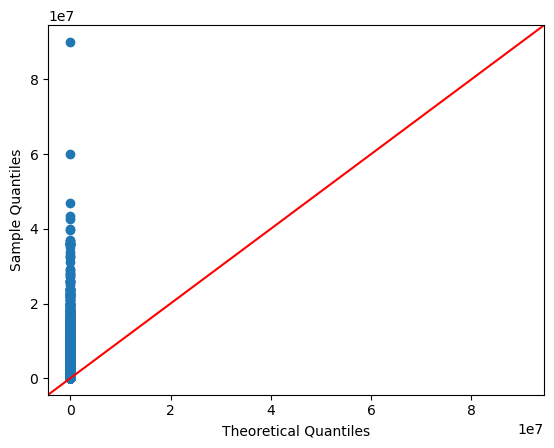

In [1165]:
qqplot(tt.Sold_Price, line='45')[0]

#### Shapiro-Wilk test

In [1168]:
stat, p = shapiro(tt.Sold_Price)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

nan 1.0
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


#### D'Agostino's K^2 test

In [1171]:
stat, p = normaltest(tt.Sold_Price)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=nan
Sample does not look Gaussian (reject H0)


#### Anderson-Darling test

In [1173]:
result = anderson(tt.Sold_Price)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: nan
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


Hard fail. Let's transform the data.

<AxesSubplot:xlabel='Sold_Price'>

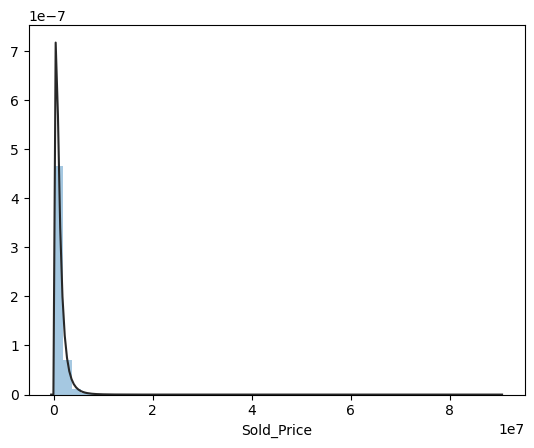

In [1178]:
sns.distplot(tt.Sold_Price, kde=False, fit=stats.lognorm)

Before we do any transforming, lets check dtypes, correlation and do some EDA.

### Data types

Divide into qualitative and quantitative.

In [1216]:
quantitative = [f for f in tt.columns if tt.dtypes[f] != 'object']
quantitative.remove('Sold_Price')
quantitative.remove('Id')
qualitative = [f for f in tt.columns if tt.dtypes[f] == 'object']

In [1217]:
quantitative, qualitative

(['Year_built',
  'Lot',
  'Bathrooms',
  'Full_bathrooms',
  'Total_interior_livable_area',
  'Total_spaces',
  'Garage_spaces',
  'Tax_assessed_value',
  'Annual_tax_amount',
  'Listed_Price',
  'Last_Sold_Price',
  'Days_Listed',
  'Days_Sold',
  'Address_NoLen',
  'Summary_Len',
  'Schools_Score',
  'Schools_Distance',
  'Total_Appliances'],
 ['Type',
  'Heating',
  'Cooling',
  'Parking',
  'Bedrooms',
  'Flooring',
  'Zip',
  'State',
  'Address_RdType',
  'Hookups'])

In [1219]:
tt.to_csv('tt.csv', index=False)

In [620]:
import seaborn as sns

In [621]:
missing = train.isna().sum()

In [622]:
missing = missing[missing>0]

In [623]:
missing.sort_values(inplace=True)

In [624]:
a = train.Summary
new_Summary = np.where(a == '.', "NaN", a)

In [625]:
train['Summary'] = new_Summary.copy()

In [626]:
train.query("Summary == '.'")

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Region,Elementary School,Elementary School Score,Elementary School Distance,Middle School,Middle School Score,Middle School Distance,High School,High School Score,High School Distance,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
